In [1]:
##import the necessary packages.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import time
import math

#set the random seed to obtain outcomes.
np.random.seed(0)
tf.random.set_seed(0)

## Data Generation

In [2]:
#Extract the MINIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

#change into black and white
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255




In [3]:
#Seperate the different data
#discard the label data because of unsupervised learning
digit1_train=X_train[y_train==1]
digit2_train=X_train[y_train==2]
digit3_train=X_train[y_train==3]
digit4_train=X_train[y_train==4]
digit5_train=X_train[y_train==5]
digit6_train=X_train[y_train==6]
digit7_train=X_train[y_train==7]
digit8_train=X_train[y_train==8]
digit9_train=X_train[y_train==9]
digit0_train=X_train[y_train==0]


digit1_test=X_test[y_test==1]
digit2_test=X_test[y_test==2]
digit3_test=X_test[y_test==3]
digit4_test=X_test[y_test==4]
digit5_test=X_test[y_test==5]
digit6_test=X_test[y_test==6]
digit7_test=X_test[y_test==7]
digit8_test=X_test[y_test==8]
digit9_test=X_test[y_test==9]
digit0_test=X_test[y_test==0]

In [4]:
angle_list=[30,60,120,150,210,240,300,330]


In [5]:
#define a rotation function 
#it rotates the image with the list of angle.
def rotation(angle_list,inputs):
    output_list=[]
    height=inputs[0].shape[0]                                   #define the height of the image
    width=inputs[0].shape[1]
    for k in range(inputs.shape[0]):
        for angle in angle_list:
            angle=math.radians(angle)                               #converting degrees to radians
            cosine=math.cos(angle)
            sine=math.sin(angle)
            # Define the height and width of the new image that is to be formed
            new_height  = round(abs(inputs[k].shape[0]*cosine)+abs(inputs[k].shape[1]*sine))+1
            new_width  = round(abs(inputs[k].shape[1]*cosine)+abs(inputs[k].shape[0]*sine))+1
    
            # define another image variable of dimensions of new_height and new _column filled with zeros
            output=np.zeros((new_height,new_width))#,image.shape[2]))
        
            # Find the centre of the image about which we have to rotate the image
            original_centre_height   = round(((inputs[k].shape[0]+1)/2)-1)    #with respect to the original image
            original_centre_width    = round(((inputs[k].shape[1]+1)/2)-1)    #with respect to the original image
    
            # Find the centre of the new image that will be obtained
            new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
            new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image
        
            for i in range(height):
                for j in range(width):
                    #co-ordinates of pixel with respect to the centre of original image
                    y=inputs[k].shape[0]-1-i-original_centre_height                   
                    x=inputs[k].shape[1]-1-j-original_centre_width
                    
                    #Here we need round it back into intergers because of pixels.
                    new_y=round(-x*sine+y*cosine)
                    new_x=round(x*cosine+y*sine)
                
                    new_y=new_centre_height-new_y
                    new_x=new_centre_width-new_x
                    ###check 
                    if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
                        output[new_y,new_x]=inputs[k,i,j]
            output_list.append(output)
    output_list=np.asarray(output_list)
    return output_list

In [8]:
%%time
#produce rotation outcomes
output_digit4=rotation(angle_list,digit4_train)

CPU times: user 57.5 s, sys: 1.06 s, total: 58.6 s
Wall time: 59 s


In [7]:
#Define the function
#The function shifts images in a horizontal way to right.

def Shift_h(shift,inputs):
    #shift horizontally function 
    rows,cols=inputs.shape[1:3]
    data_train=[]
    for k in range(inputs.shape[0]):
        for i in range(0,shift):
            #fit the data into new position according to equation
            zeros=np.zeros((rows,cols+shift))
            zeros[:rows,i:i+cols]=inputs[k]
            data_train.append(zeros)
    data_train=np.asarray(data_train)
    return data_train

In [72]:
#produce shift outcomes
output_digit8=Shift_h(8,digit8_train)

In [74]:
output_digit8.shape

(46808, 28, 36)

In [75]:
output_digit4.shape

(46736, 39, 39)

In [85]:
#define a combine vertically function to obtaion two object in same scene.
#the input are defined as one shift frames and one rotation frames
def combine_v(shift_out, rotation_out):
    # calculate the data shape of new pixels(canvas)
    lens=min(shift_out.shape[0],rotation_out.shape[0])
    rows=2+shift_out.shape[1]+rotation_out.shape[1]
    cols=max(shift_out.shape[2],rotation_out.shape[2])
    
    data=np.empty((lens,rows,cols))
    zeros=np.empty((rows,cols))
    
    row_s,col_s=shift_out.shape[1:3]
    row_r,col_r=rotation_out.shape[1:3]
    #fit the shift frames and rotation frames together.
    for k in range(lens):
        zeros[:row_r,:col_r]=rotation_out[k]
        zeros[rows-row_s:rows,:col_s]=shift_out[k]
        zeros[rows-row_s:rows,col_s:col_r]=0
        data[k]=zeros
    return data

In [86]:
data=combine_v(output_digit8, output_digit4)
data.shape

(46736, 69, 39)

In [91]:
#Define a function to plot pixels.
def plot_image(image):
    plt.imshow(image, cmap="gray")
    plt.axis("off")

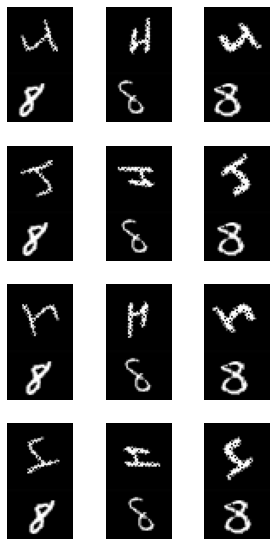

In [130]:
fig = plt.figure(figsize=(5, 20))
index=list(range(0,8,2))
index_=list(range(0,12,3))
for image_index in range(4):
    plt.subplot(8, 3, index_[image_index]+1)
    plot_image(data[index[image_index]])
for image_index in range(4):
    plt.subplot(8, 3, index_[image_index]+2)
    plot_image(data[800+index[image_index]])
for image_index in range(4):
    plt.subplot(8, 3, index_[image_index]+3)
    plot_image(data[240+index[image_index]])
plt.savefig('shift_rotation.jpg')

In [101]:
#split the dataset into train and valid dataset
x_train=data[:30000,:]
x_valid=data[30000:46736,:]

In [102]:
#define the loss function
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [103]:
#define the Gaussian distribution according to Reparameterization Trick in order to calculate latent variable z
K = keras.backend
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [109]:
#define a function to show reconstructions according to the diversity of latent space dimensionality.
#here we only focus on the dimension of latent variable 


#Here we pre-defined the VAE layers so that the shape need to be manually adjusted
def VAE(codings_size_val):
    tf.random.set_seed(42)
    np.random.seed(42)
    ###latent space dimension
    codings_size = codings_size_val
    #Encoder
    inputs = keras.layers.Input(shape=[69, 39])          #pixels according to the inputs
    z = keras.layers.Flatten()(inputs)                   #Flatten the features
    z = keras.layers.Dense(150, activation="selu")(z)    #fully connected Layer 1
    z = keras.layers.Dense(100, activation="selu")(z)    #fully connected Layer 2
    codings_mean = keras.layers.Dense(codings_size)(z)   #Latent space
    codings_log_var = keras.layers.Dense(codings_size)(z)#Sampling Gaussian distribution
    codings = Sampling()([codings_mean, codings_log_var])
    variational_encoder = keras.models.Model(
        inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])
    ###########################################################################
    #Decoder
    decoder_inputs = keras.layers.Input(shape=[codings_size])
    x = keras.layers.Dense(100, activation="selu")(decoder_inputs)     #fully connected Layer 1
    x = keras.layers.Dense(150, activation="selu")(x)                  #fully connected Layer 2
    x = keras.layers.Dense(69 * 39, activation="sigmoid")(x)           #Output Layer
    outputs = keras.layers.Reshape([69, 39])(x)
    variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs]) #combined encoder and decoder
    ###########################################################################
    _, _, codings = variational_encoder(inputs)
    reconstructions = variational_decoder(codings) #how to structure reconstructions
    variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])
    ###########################################################################
    #regularization term
    latent_loss = -0.5 * K.sum(
        1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
        axis=-1)
    variational_ae.add_loss(K.mean(latent_loss) / 2691.) 
    variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop",metrics=[rounded_accuracy])
    #return the model
    return variational_ae

2691

In [131]:
#define a function to show reconstructions 
def show_reconstructions(model, images=x_valid, n_images=8):
    #counts=images.shape[0]/12
    #randoms=np.random.randint(0,counts,n_images)
    #index=12 * randoms
    #index=list(range(12))
    ids=[0,24000]
    index=list(range(ids[0],ids[0]+n_images))+list(range(ids[1],ids[1]+n_images))
    reconstructions = model.predict(images[index])
    fig = plt.figure(figsize=(n_images * 3, 5))
    
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.title('Original image')
        plot_image(images[index[image_index]])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
        plt.title('Reconstructed image')





In [133]:
x_valid.shape

(16736, 69, 39)

## How we decide the suitable dimensionality of latent space

In [136]:
Performance_dim=[2,3,5,10]

def performance(Performance_dim):
    Performance_loss=[]
    Performance_time=[]
    for i in Performance_dim:
        
        variational_ae=VAE(i)
        import time
        time_start=time.time()
        history = variational_ae.fit(x_train, x_train, epochs=10,
                             validation_data=(x_valid, x_valid),verbose=0)
        time_end=time.time()
        time=time_end-time_start
        Performance_time.append(time)
        Performance_loss.append(history.history['loss'][-1])
        show_reconstructions(variational_ae)
        plt.savefig('shiftrotation_dim'+str(i)+'.jpg')
    return Performance_time,Performance_loss

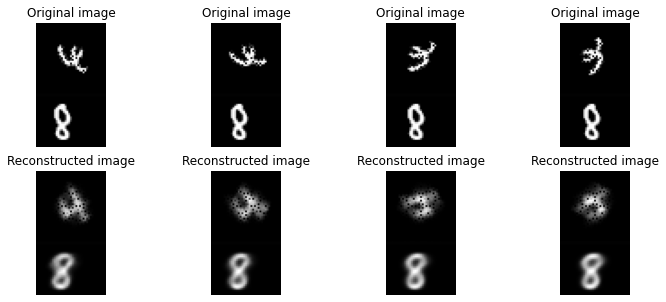

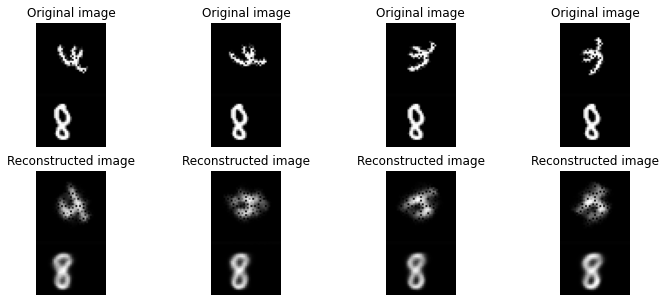

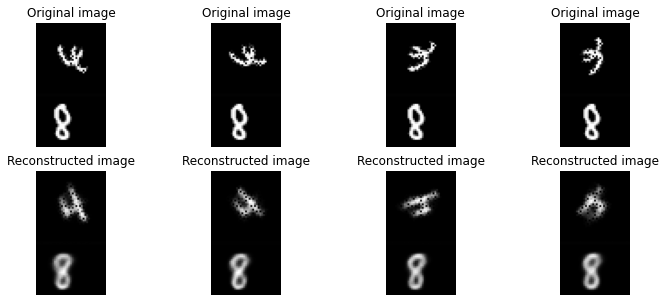

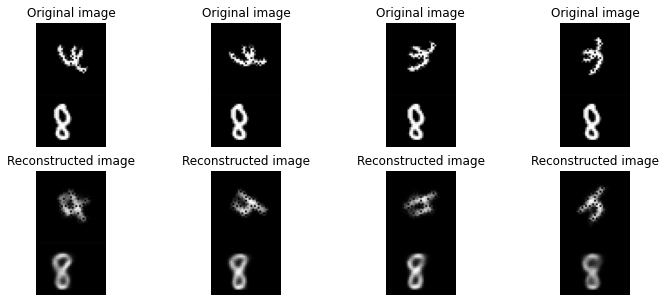

In [137]:
Performance_time,Performance_loss=performance(Performance_dim)

In [138]:
performance = pd.DataFrame({'Dimension': Performance_dim,'loss': Performance_loss, 'time':Performance_time})
performance

,Dimension,loss,time
0,2,0.121558,93.891600
1,3,0.117184,83.280627
2,5,0.109222,93.708015
3,10,0.100252,96.723362
